# model_XGBoost_regression

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np

## IMPORT

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
file_path='../DATA/DATA_240131B/final_DATA.csv'
df = pd.read_csv(file_path, encoding='utf-8', sep=';', index_col=0, low_memory=False)
df.shape

(33803, 268)

In [4]:
file_path='../DATA/DATA_240131B/final_4first_col.csv'
df_info = pd.read_csv(file_path, encoding='utf-8', sep=';', index_col=0, low_memory=False)
df_info.shape


(33803, 4)

In [5]:
df_info.head(5)

,dep,nomdep,codecommune,nomcommune
key,,,,
01001,01,AIN,01001,L'ABERGEMENT-CLÉMENCIAT
01002,01,AIN,01002,L'ABERGEMENT-DE-VAREY
01004,01,AIN,01004,AMBÉRIEU-EN-BUGEY
01005,01,AIN,01005,AMBÉRIEUX-EN-DOMBES
01006,01,AIN,01006,AMBLÉON


In [6]:
df.head()

,TAR_inscrits,TAR_votants,TAR_exprimes,YYY_pvoixNUP,YYY_pvoixECO,YYY_pvoixENS,TAR_electeurs,YYY_pvoixLR_UDI,YYY_pvoixEXTREMD,YYY_pvoixCENTRE,...,TER_surf68,NAT_petranger22,NAT_pimmigre22,NAT_pimmnatur22,NAT_pnatur22,NAT_petranger12,NAT_pimmigre12,NAT_pimmnatur12,NAT_petranger02,NAT_petranger92
0,644.0,343.0,339.0,0.153392,0.023599,0.147493,644.0000,0.271386,0.318584,0.073746,...,0.0,0.005161,0.014194,0.009032,0.014194,0.025740,0.037323,0.011583,0.018543,0.014634
1,218.0,133.0,128.0,0.343750,0.000000,0.000000,218.0000,0.109375,0.078125,0.437500,...,0.0,0.003891,0.003891,0.000000,0.000000,0.012766,0.021277,0.008511,0.005618,0.037736
2,8844.0,4123.0,4012.0,0.298106,0.000000,0.000000,9887.9053,0.087488,0.262961,0.321037,...,0.0,0.089823,0.107816,0.017993,0.027062,0.079042,0.102438,0.023396,0.066773,0.060427
3,1299.0,636.0,622.0,0.160772,0.024116,0.178457,1531.4249,0.204180,0.376206,0.048232,...,0.0,0.013349,0.041788,0.028439,0.042948,0.014007,0.036541,0.022533,0.026063,0.043729
4,101.0,63.0,59.0,0.220339,0.000000,0.288136,101.0000,0.288136,0.152542,0.000000,...,0.0,0.044643,0.044643,0.000000,0.000000,0.090909,0.100000,0.009091,0.000000,0.000000


### Fusion 

In [7]:
df_FULL = df.copy()
df_FULL.shape

(33803, 268)

In [8]:
df_FULL.index = df_info.index 
df_FULL.head(2)

,TAR_inscrits,TAR_votants,TAR_exprimes,YYY_pvoixNUP,YYY_pvoixECO,YYY_pvoixENS,TAR_electeurs,YYY_pvoixLR_UDI,YYY_pvoixEXTREMD,YYY_pvoixCENTRE,...,TER_surf68,NAT_petranger22,NAT_pimmigre22,NAT_pimmnatur22,NAT_pnatur22,NAT_petranger12,NAT_pimmigre12,NAT_pimmnatur12,NAT_petranger02,NAT_petranger92
key,,,,,,,,,,,,,,,,,,,,,
01001,644.0,343.0,339.0,0.153392,0.023599,0.147493,644.0,0.271386,0.318584,0.073746,...,0.0,0.005161,0.014194,0.009032,0.014194,0.025740,0.037323,0.011583,0.018543,0.014634
01002,218.0,133.0,128.0,0.343750,0.000000,0.000000,218.0,0.109375,0.078125,0.437500,...,0.0,0.003891,0.003891,0.000000,0.000000,0.012766,0.021277,0.008511,0.005618,0.037736


In [9]:
# result = pd.concat([df1, df2], axis=0, ignore_index=True)
df_FULL = pd.concat([df_FULL, df_info], axis=1)
df_FULL.shape

(33803, 272)

In [10]:
df_FULL.head(5)

,TAR_inscrits,TAR_votants,TAR_exprimes,YYY_pvoixNUP,YYY_pvoixECO,YYY_pvoixENS,TAR_electeurs,YYY_pvoixLR_UDI,YYY_pvoixEXTREMD,YYY_pvoixCENTRE,...,NAT_pnatur22,NAT_petranger12,NAT_pimmigre12,NAT_pimmnatur12,NAT_petranger02,NAT_petranger92,dep,nomdep,codecommune,nomcommune
key,,,,,,,,,,,,,,,,,,,,,
01001,644.0,343.0,339.0,0.153392,0.023599,0.147493,644.0000,0.271386,0.318584,0.073746,...,0.014194,0.025740,0.037323,0.011583,0.018543,0.014634,01,AIN,01001,L'ABERGEMENT-CLÉMENCIAT
01002,218.0,133.0,128.0,0.343750,0.000000,0.000000,218.0000,0.109375,0.078125,0.437500,...,0.000000,0.012766,0.021277,0.008511,0.005618,0.037736,01,AIN,01002,L'ABERGEMENT-DE-VAREY
01004,8844.0,4123.0,4012.0,0.298106,0.000000,0.000000,9887.9053,0.087488,0.262961,0.321037,...,0.027062,0.079042,0.102438,0.023396,0.066773,0.060427,01,AIN,01004,AMBÉRIEU-EN-BUGEY
01005,1299.0,636.0,622.0,0.160772,0.024116,0.178457,1531.4249,0.204180,0.376206,0.048232,...,0.042948,0.014007,0.036541,0.022533,0.026063,0.043729,01,AIN,01005,AMBÉRIEUX-EN-DOMBES
01006,101.0,63.0,59.0,0.220339,0.000000,0.288136,101.0000,0.288136,0.152542,0.000000,...,0.000000,0.090909,0.100000,0.009091,0.000000,0.000000,01,AIN,01006,AMBLÉON


#### FILTRES 200 inscrits

In [12]:
# Specify the file path
file_path = '../DATA/DATA_240131B/list_codecommune_leg2022_200inscrits.txt'

# Open the text file and read lines into a list
with open(file_path, 'r', encoding='utf-8') as file:
    lines = [line.strip() for line in file.readlines()]

# Print or manipulate the list of lines as needed
print(lines[0:10], len(lines))

['01001', '01002', '01004', '01005', '01007', '01008', '01009', '01010', '01011', '01012'] 23973


In [13]:
index_suppr = ['13201','13202','13203','13204','13205','13206','13207','13208','13209','13210','13211','13212','13213','13214','13215','13216',
               '69380','69381','69382','69383','69384','69385','69386','69387','69388','69389','75056']


In [14]:
linesC = list(set(lines) - set(index_suppr))
len (linesC)

23946

In [15]:
df_filtered = df_FULL[df_FULL['codecommune'].isin(linesC)]
df_filtered.shape,df_FULL.shape

((23946, 272), (33803, 272))

# SLPIT

In [16]:
df_infoC = df_filtered.iloc[:, -4:] 
df_infoC.shape

(23946, 4)

In [17]:
df_XY = df_filtered.iloc[:, 0:-4] 
df_XY.shape

(23946, 268)

In [18]:
# SPLIT
y = df_XY.filter(like='YYY', axis=1)
# Filter columns NOT starting with 'YYY'
X = df_XY.loc[:, ~df.columns.str.startswith('YYY')]
X.shape, y.shape

((23946, 261), (23946, 7))

In [19]:
print(y)

       YYY_pvoixNUP  YYY_pvoixECO  YYY_pvoixENS  YYY_pvoixLR_UDI  \
key                                                                
01001      0.153392      0.023599      0.147493         0.271386   
01002      0.343750      0.000000      0.000000         0.109375   
01004      0.298106      0.000000      0.000000         0.087488   
01005      0.160772      0.024116      0.178457         0.204180   
01007      0.251241      0.000000      0.000000         0.049652   
...             ...           ...           ...              ...   
95675      0.235772      0.010840      0.157182         0.165312   
95676      0.140351      0.087719      0.232456         0.166667   
95678      0.184874      0.047619      0.282913         0.131653   
95680      0.460476      0.010000      0.235714         0.031667   
95690      0.161677      0.083832      0.305389         0.209581   

       YYY_pvoixEXTREMD  YYY_pvoixCENTRE  YYY_pvoixOTR  
key                                                     
0

In [20]:
titr_cols_list = X.columns.tolist()
titr_cols_list[0]

'TAR_inscrits'

### Cumul YYY TODO 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('X_train shape : ', X_train.shape)
print('X_test shape : ', X_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (21551, 261)
X_test shape :  (2395, 261)
y_train shape :  (21551, 7)
y_test shape :  (2395, 7)


### StandardScaler

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
set(y)

{'YYY_pvoixCENTRE',
 'YYY_pvoixECO',
 'YYY_pvoixENS',
 'YYY_pvoixEXTREMD',
 'YYY_pvoixLR_UDI',
 'YYY_pvoixNUP',
 'YYY_pvoixOTR'}

In [24]:
y

,YYY_pvoixNUP,YYY_pvoixECO,YYY_pvoixENS,YYY_pvoixLR_UDI,YYY_pvoixEXTREMD,YYY_pvoixCENTRE,YYY_pvoixOTR
key,,,,,,,
01001,0.153392,0.023599,0.147493,0.271386,0.318584,0.073746,0.011799
01002,0.343750,0.000000,0.000000,0.109375,0.078125,0.437500,0.031250
01004,0.298106,0.000000,0.000000,0.087488,0.262961,0.321037,0.030409
01005,0.160772,0.024116,0.178457,0.204180,0.376206,0.048232,0.008039
01007,0.251241,0.000000,0.000000,0.049652,0.290963,0.397219,0.010924
...,...,...,...,...,...,...,...
95675,0.235772,0.010840,0.157182,0.165312,0.371274,0.040650,0.018970
95676,0.140351,0.087719,0.232456,0.166667,0.328947,0.026316,0.017544
95678,0.184874,0.047619,0.282913,0.131653,0.296919,0.025210,0.030812


## xgboost as xgb verion 0

In [123]:
# model = xgb.XGBRegressor(objective='reg:squarederror')

# # Train the model separately for each dimension of y
# for i in range(y_train.shape[1]):
#     model.fit(X_train, y_train.iloc[:, i])
#     y_pred = model.predict(X_test)
#     mse = mean_squared_error(y_test.iloc[:, i], y_pred)
#     print(f"Mean Squared Error for y{i+1}: {mse:.6f}")

Mean Squared Error for y1: 0.000166
Mean Squared Error for y2: 0.005610
Mean Squared Error for y3: 0.002537
Mean Squared Error for y4: 0.000348
Mean Squared Error for y5: 0.001100
Mean Squared Error for y6: 0.006538
Mean Squared Error for y7: 0.001184
Mean Squared Error for y8: 0.008721
Mean Squared Error for y9: 0.003891
Mean Squared Error for y10: 0.000666
Mean Squared Error for y11: 0.004826


## Random Forest as xgb verion 1

In [25]:
# import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor()

# fitting
# Créer un modèle MultiOutputRegressor avec LightGBM
multioutput_model = MultiOutputRegressor(RF_model)

# Entraîner le modèle
multioutput_model.fit(X_train_scaled, y_train)



MultiOutputRegressor(estimator=RandomForestRegressor())

In [26]:
# predicting
print(np.mean((multioutput_model.predict(X_test_scaled ) - y_test)**2, axis=0))

YYY_pvoixNUP        0.004041
YYY_pvoixECO        0.000319
YYY_pvoixENS        0.004729
YYY_pvoixLR_UDI     0.005522
YYY_pvoixEXTREMD    0.003535
YYY_pvoixCENTRE     0.003945
YYY_pvoixOTR        0.000760
dtype: float64


In [28]:
pred0 = multioutput_model.predict([X_test_scaled[0]]) 
pred0.shape

(1, 7)

In [29]:
y_test.iloc[0]

YYY_pvoixNUP        0.269939
YYY_pvoixECO        0.012270
YYY_pvoixENS        0.429448
YYY_pvoixLR_UDI     0.000000
YYY_pvoixEXTREMD    0.245399
YYY_pvoixCENTRE     0.036810
YYY_pvoixOTR        0.006135
Name: 38404, dtype: float64

In [30]:
target_title=[]
for c in y_test : 
    target_title.append(c[9:])
target_title  

['NUP', 'ECO', 'ENS', 'LR_UDI', 'EXTREMD', 'CENTRE', 'OTR']

In [32]:
import random 
x = np.random.randint(len(y_test))
print ('X:',x)
print (df_infoC.iloc[x])
pred = multioutput_model.predict([X_test_scaled[x]]) 
for i in range (len(pred[0])) :
    print (target_title[i] , ':', pred[0][i], '>', y_test.iloc[x,i] ,' >>> ', pred[0][i] - y_test.iloc[x,i],' >>> ', (pred[0][i] - y_test.iloc[x,i])/pred[0][i])

X: 2334
dep                     12
nomdep             AVEYRON
codecommune          12089
nomcommune     DECAZEVILLE
Name: 12089, dtype: object
NUP : 0.22525314777 > 0.18277946  >>>  0.04247368776999999  >>>  0.1885597967908033
ECO : 0.016845886126000006 > 0.011077543  >>>  0.005768343126000006  >>>  0.3424185040107283
ENS : 0.21358753420999999 > 0.21399799  >>>  -0.00041045579000001386  >>>  -0.0019217216562669446
LR_UDI : 0.046207096842199966 > 0.044310171  >>>  0.0018969258421999632  >>>  0.041052694755484856
EXTREMD : 0.35276109763999985 > 0.431520629  >>>  -0.07875953136000013  >>>  -0.22326592100690168
CENTRE : 0.08702432498900001 > 0.083585096  >>>  0.0034392289890000094  >>>  0.039520317904617276
OTR : 0.04746408249999999 > 0.0327291038  >>>  0.014734978699999991  >>>  0.3104448231986786


In [ ]:
# X: 1475
# dep                                 04
# nomdep         ALPES-DE-HAUTE-PROVENCE
# codecommune                      04013
# nomcommune                   AUBIGNOSC
# Name: 04013, dtype: object
# AUG : 0.019658107 > 0.012948208  >>>  0.006709899310533524  >>>  0.3413298749741852
# NUP : 0.28878126 > 0.27191234  >>>  0.016868915483627345  >>>  0.05841416353487577
# DVG : 0.026710555 > 0.0  >>>  0.02671055495738983  >>>  1.0
# ECO : 0.02362611 > 0.04681275  >>>  -0.023186640414834023  >>>  -0.9813990039812613
# REG : 0.016958749 > 0.0  >>>  0.016958748921751976  >>>  1.0
# ENS : 0.15867114 > 0.24601594  >>>  -0.08734479932922362  >>>  -0.5504769106718255
# UDI : 0.0010576048 > 0.0  >>>  0.001057604793459177  >>>  1.0
# LR : 0.050214782 > 0.0  >>>  0.05021478235721588  >>>  1.0
# DVD : 0.033202764 > 0.070717134  >>>  -0.03751437035315895  >>>  -1.1298568622834537
# REC : 0.037619688 > 0.048804782  >>>  -0.011185094383174894  >>>  -0.2973202355399796
# RN : 0.29964826 > 0.30278885  >>>  -0.003140594890213011  >>>  -0.010480938355747609

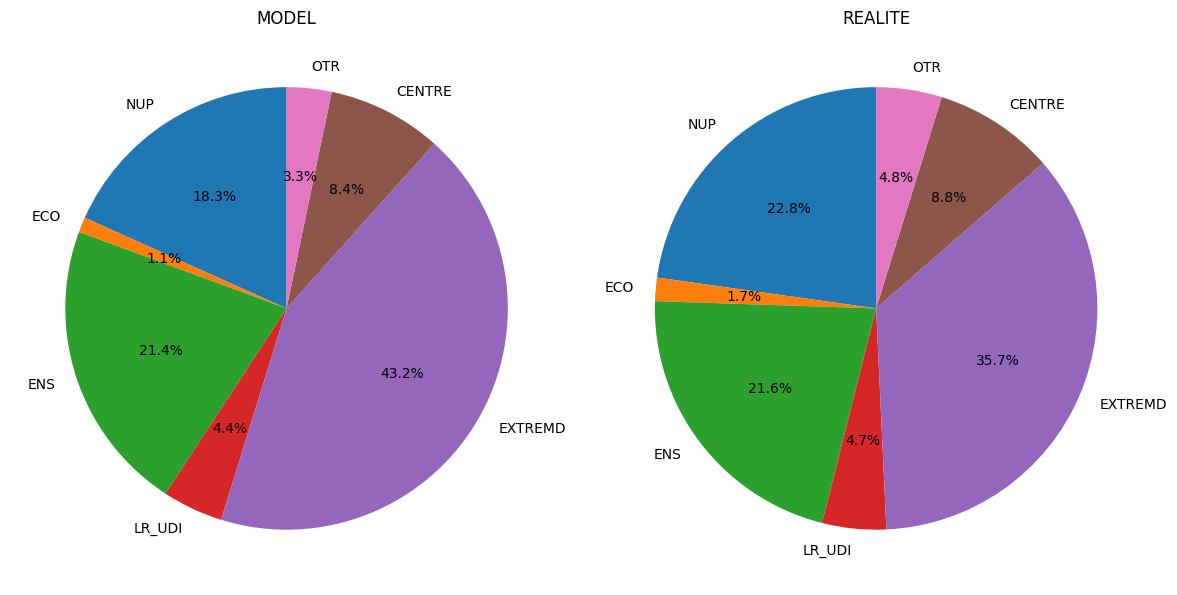

In [33]:
import matplotlib.pyplot as plt

values1 = y_test.iloc[x]
values2 = pred[0]
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart
axs[0].pie(values1, labels=target_title , autopct='%1.1f%%', startangle=90)
axs[0].set_title('MODEL')

# Plot the second pie chart
axs[1].pie(values2, labels=target_title , autopct='%1.1f%%', startangle=90)
axs[1].set_title('REALITE')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
feature_importances_target1 = multioutput_model.estimators_[0].feature_importances_
arg_importances_target1 = multioutput_model.estimators_[0].feature_importances_.argsort()[::-1][:10]
feature_importances_target2 = multioutput_model.estimators_[1].feature_importances_
arg_importances_target1 = multioutput_model.estimators_[1].feature_importances_.argsort()[::-1][:10]

In [36]:
feature_importances_target1.max(),feature_importances_target1.min()

(0.1586579642157784, 0.0003790158010628282)

In [37]:
arg_importances_target1, feature_importances_target1

(array([127, 212, 145, 126, 213, 143, 214, 137, 132, 215]),
 array([0.00050479, 0.00063731, 0.00052612, 0.00037902, 0.00156186,
        0.00382504, 0.00515521, 0.01162817, 0.00097627, 0.00318421,
        0.00194317, 0.00207078, 0.00129696, 0.00135782, 0.002801  ,
        0.00206138, 0.00122413, 0.00139994, 0.00322594, 0.00350121,
        0.00326279, 0.00342751, 0.00230634, 0.00255073, 0.00280307,
        0.00318961, 0.00259283, 0.00303217, 0.00314012, 0.00053481,
        0.00271139, 0.00760715, 0.00172826, 0.00089676, 0.00094127,
        0.02265514, 0.00149931, 0.00070842, 0.00075938, 0.00327674,
        0.00435098, 0.00352346, 0.00320521, 0.0037987 , 0.0030144 ,
        0.0032491 , 0.00334187, 0.00241541, 0.00238554, 0.00429831,
        0.00043619, 0.00291485, 0.00075786, 0.00084479, 0.00082774,
        0.00079268, 0.00082676, 0.00083571, 0.00069871, 0.0006053 ,
        0.00283253, 0.0032441 , 0.00332152, 0.00199211, 0.00302838,
        0.00331356, 0.00320065, 0.00313493, 0.00184389, 

In [38]:
titr_cols_list[113]

'BFL_tauxhabitation20'

In [40]:

# Access feature importances for the first target
feature_importances_target1 = multioutput_model.estimators_[0].feature_importances_

# Get the indices of the top 10 features for the first target
top_features_indices_target1 = feature_importances_target1.argsort()[::-1][:50]

# Create a DataFrame to store the results
top_features_df_target1 = pd.DataFrame({
    'Feature_Index': top_features_indices_target1,
    'Feature_Importance': feature_importances_target1[top_features_indices_target1]
})

top_features_df_target1['info'] = top_features_df_target1['Feature_Index'].apply(lambda x: titr_cols_list[x])

# Print the DataFrame with the top features for the first target
print("Top Features for Target1:")
print(top_features_df_target1)

Top Features for Target1:
    Feature_Index  Feature_Importance                   info
0             127            0.158658          GEO_longitude
1             126            0.089075           GEO_latitude
2              35            0.022655         AGE_poph014_12
3             215            0.021197  CED_nvolsvoitures2020
4             213            0.015176  CED_ncambriolages2020
5             257            0.013822         NAT_pimmigre12
6             212            0.012133  CED_ncambriolages2016
7             230            0.011990        CSP_percadr2012
8               7            0.011628           RSA_prsa2021
9             233            0.009799        CSP_perpint2002
10            214            0.009442  CED_nvolsvoitures2016
11            234            0.008683        CSP_perpint2012
12            120            0.008399       PIB_pibratio2012
13            132            0.008190           KP0_prim2_P1
14             31            0.007607         AGE_popf014_1

In [40]:
pred0

array([[ 1.2073030e-02,  2.0008838e-01,  9.6360259e-03,  1.6450570e-03,
        -2.7248161e-04,  2.7795851e-01,  1.4061260e-03,  1.9512649e-01,
         2.8967749e-02,  3.8176954e-02,  1.7173229e-01]], dtype=float32)

In [51]:
multioutputregressor.best_estimator_.feature_importances_

AttributeError: 'MultiOutputRegressor' object has no attribute 'best_estimator_'

In [19]:
# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)))

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [    0     1     2 ... 62762 62763 62764], got [0.0000000e+00 4.5981240e-05 9.7314129e-05 ... 9.5973152e-01 9.7619045e-01
 1.0000000e+00]

In [20]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset as an example
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])